In [10]:
using LinearAlgebra, Distributions, Random, Rotations, Statistics
using Printf
using Plots

global const µ = 3.986e14  # m^3/s^2

include("eval_f.jl")
include("forward_euler.jl")
include("trap.jl")
include("generate_random_initial_state.jl")
include("visualizeNetwork.jl")

f(x, p) = feval(x, p, 0)
f(x) = f(x, 0)

f (generic function with 2 methods)

In [2]:
mean_a = 8e6
stddev_a = 1e4
mean_e = 0.01
stddev_e = 0.1

N = 10

x0 = generate_random_initial_state(N, mean_a, stddev_a, mean_e, stddev_e, true);

In [3]:
@time begin
    num_orbs = 1
    t0 = 0
    ti = 8e3 * num_orbs  # one orbit ~ 1e4 sec
    num_steps = 5000 * num_orbs

    xs = euler(f, t0, ti, x0, num_steps);
end

  1.170002 seconds (4.01 M allocations: 220.050 MiB, 17.70% gc time, 94.81% compilation time)


5001×60 Matrix{Float64}:
 -1.6014e6   3.17529e6  -6.78124e6  -6868.07  …  6893.39  -1807.87  -1431.75
 -1.61239e6  3.17734e6  -6.77747e6  -6865.79     6890.22  -1812.12  -1440.92
 -1.62338e6  3.17939e6  -6.77368e6  -6863.5      6887.03  -1816.36  -1450.08
 -1.63436e6  3.18144e6  -6.76988e6  -6861.19     6883.82  -1820.6   -1459.25
 -1.64534e6  3.18347e6  -6.76607e6  -6858.87     6880.6   -1824.83  -1468.4
 -1.65631e6  3.1855e6   -6.76224e6  -6856.53  …  6877.36  -1829.06  -1477.56
 -1.66728e6  3.18752e6  -6.75839e6  -6854.18     6874.11  -1833.28  -1486.71
 -1.67825e6  3.18953e6  -6.75453e6  -6851.81     6870.85  -1837.5   -1495.85
 -1.68921e6  3.19154e6  -6.75065e6  -6849.43     6867.57  -1841.72  -1504.99
 -1.70017e6  3.19354e6  -6.74676e6  -6847.03     6864.27  -1845.93  -1514.13
 -1.71113e6  3.19553e6  -6.74285e6  -6844.61  …  6860.96  -1850.13  -1523.27
 -1.72208e6  3.19752e6  -6.73893e6  -6842.18     6857.64  -1854.34  -1532.4
 -1.73303e6  3.19949e6  -6.73499e6  -6839.73     6854

In [4]:
@time begin
    num_orbs = 1
    t0 = 0
    ti = 8e3 * num_orbs  # one orbit ~ 1e4 sec
    num_steps = 200 * num_orbs

    xs_t = trapezoid(f, t0, ti, x0, 0, num_steps);
    xs_t = reduce(hcat,xs_t)'  # vector of vectors -> 2d array
end

  5.304735 seconds (19.20 M allocations: 1.214 GiB, 5.36% gc time, 94.32% compilation time)


201×60 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.6014e6   3.17529e6  -6.78124e6  -6868.07  …  6893.39  -1807.87  -1431.75
 -1.87489e6  3.22444e6  -6.68221e6  -6806.28     6809.39  -1912.65  -1659.73
 -2.14571e6  3.26901e6  -6.57368e6  -6734.7      6716.26  -2014.64  -1885.05
 -2.41347e6  3.30892e6  -6.45578e6  -6653.42     6614.17  -2113.71  -2107.41
 -2.67779e6  3.3441e6   -6.32867e6  -6562.54     6503.32  -2209.73  -2326.48
 -2.93829e6  3.37452e6  -6.19252e6  -6462.19  …  6383.89  -2302.56  -2541.96
 -3.19458e6  3.40011e6  -6.04752e6  -6352.5      6256.1   -2392.08  -2753.54
 -3.4463e6   3.42083e6  -5.89387e6  -6233.66     6120.16  -2478.18  -2960.95
 -3.69309e6  3.43666e6  -5.73178e6  -6105.83     5976.32  -2560.75  -3163.89
 -3.9346e6   3.44756e6  -5.56148e6  -5969.23     5824.81  -2639.68  -3362.1
 -4.17046e6  3.45353e6  -5.38322e6  -5824.07  …  5665.89  -2714.89  -3555.31
 -4.40035e6  3.45455e6  -5.19724e6  -5670.59     5499.82  -2786.28  -3743.28
 -4.62395e6  3.45063e6

In [4]:
# Writes the visualization to example.html
visualizeNetwork(xs,"example.html",10)
# visualizeNetwork(xs_t,"example.html",1)

In [12]:
# Save the output as "orbs.txt" for reference or for use in animate.ipynb

using DelimitedFiles
writedlm("orbs_.txt", Float32.(xs))

In [3]:
using DelimitedFiles
xs = vcat([readdlm("simulation_20000_n2_1000objects_10orbit_$(i).txt") for i in 1:10]...)
#xs = readdlm("simulation_20000_1000objects_10orbit_1.txt")


5000×6000 Matrix{Float64}:
  1.79569e6   7.15545e6   5.44572e6  …  -3190.45   -555.2      6236.72
  1.89729e6   7.15664e6   5.43516e6     -3119.79   -510.067    6276.72
  1.99865e6   7.15689e6   5.42388e6     -3048.56   -464.834    6315.61
  2.09974e6   7.1562e6    5.4119e6      -2976.76   -419.509    6353.37
  2.20056e6   7.15458e6   5.3992e6      -2904.42   -374.102    6390.0
  2.3011e6    7.15202e6   5.38581e6  …  -2831.55   -328.621    6425.49
  2.40134e6   7.14855e6   5.37172e6     -2758.16   -283.075    6459.83
  2.50127e6   7.14415e6   5.35694e6     -2684.26   -237.473    6493.01
  2.60088e6   7.13884e6   5.34147e6     -2609.88   -191.823    6525.03
  2.70016e6   7.13262e6   5.32532e6     -2535.02   -146.135    6555.88
  2.7991e6    7.1255e6    5.3085e6   …  -2459.7    -100.416    6585.55
  2.89768e6   7.11748e6   5.29101e6     -2383.93    -54.6774   6614.04
  2.9959e6    7.10856e6   5.27285e6     -2307.73     -8.92648  6641.35
  ⋮                                  ⋱             

In [8]:
function plot_force(xs)
    N = floor(Int, length(xs[1,:])/6)
    t_N = floor(Int, length(xs[:,1]))

    v_x = xs[:,4:6:end]
    v_y = xs[:,5:6:end]
    v_z = xs[:,6:6:end]
    
    force = zeros(t_N-1, N)
    for i in 1:N
        a = get_force(v_x[:,i], v_y[:,i], v_z[:,i])
        force[:,i] = a
    end
    
    force = force ./ mean(force)  # normalize by the mean force
    
    Plots.plot(force,label="")
    Plots.savefig("force.png")
end

function get_force(v_x, v_y, v_z)
    a_x = v_x[1:1:end-1] - v_x[2:1:end]
    a_y = v_y[1:1:end-1] - v_y[2:1:end]
    a_z = v_z[1:1:end-1] - v_z[2:1:end]
    
    force = sqrt.(a_x.^2 + a_y.^2 + a_z.^2)
    return force
end

get_force (generic function with 1 method)

In [ ]:
function

In [5]:
function controllereval(x,p,u)
    d = 20000
    k = 5
    N = length(x);
    N6 = Int(N/6);
    f = zeros(eltype(x), N6);
    Threads.@threads for i ∈ 1:6:N
        positionsi = @view x[i:(i+2)]
        for j ∈ i:6:N
            if i != j
                positionsj = @view x[j:(j+2)]
                r_ij = positionsi - positionsj
                dist = norm(r_ij)
                accel = tanh_tol_controller(k,d,r_ij)
                @view(f[Int((i-1)/6+1)]) .+= accel
                @view(f[Int((j-1)/6+1)]) .-= accel
            end
        end
    end
    return f
end

function tanh_tol_controller(k,d,r_ij)
    mag = (-k/2 * tanh(norm(r_ij)/d-5) + k/2)
    if mag < 1e-5
        return 0
    end
    return mag
end

function get_controller_force(xs)
    yv = [controllereval(xs[x,:],0,0) for x in 1:size(xs,1)];
    yv = reduce(hcat,yv)';
    return yv
end

function plot_controller_force(xs)
    Plots.plot(get_controller_force(xs),label="")
end

plot_controller_force (generic function with 1 method)

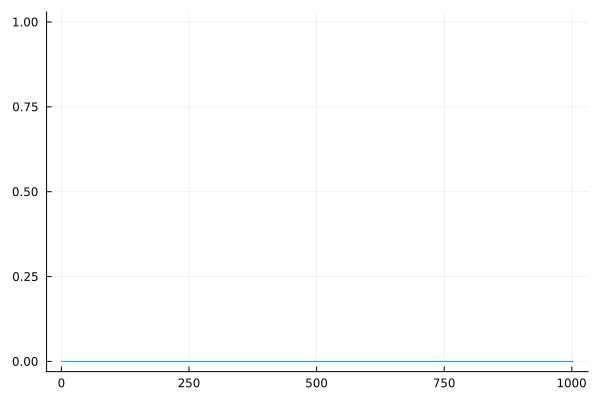

In [21]:
plot_controller_force(xs)

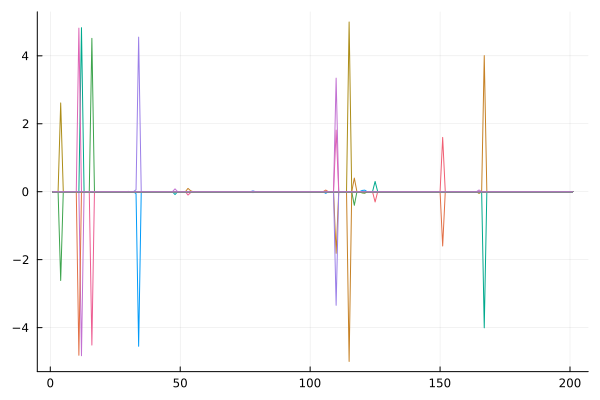

In [37]:
plot_controller_force(xs_t)

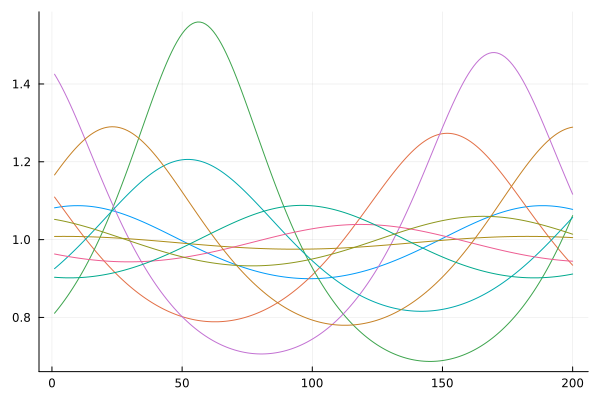

In [17]:
plot_force(xs_t)

In [9]:
plot_force(xs)

"/home/koe/Documents/6.7300/MOD-AND-SIMMIE/force.png"

In [71]:
plot_accel(xs[:,1:1:3000],20,16)

"/home/koe/Documents/6.7300/MOD-AND-SIMMIE/accel.png"

In [63]:
function plot_accel(xs,n,tstep)
    N = floor(Int, length(xs[1,:])/6)
    t_N = floor(Int, length(xs[:,1]))

    v_x = xs[:,4:6:end]
    v_y = xs[:,5:6:end]
    v_z = xs[:,6:6:end]
    
    force = zeros(t_N-1-(n-1), N)
    for i in 1:N
        a,b,c = total_accel(v_x[:,i], v_y[:,i], v_z[:,i],n)
        a = sqrt.(a.^2 + b.^2 + c.^2)
        force[:,i] = a/tstep
    end
    
    #force = force ./ mean(force)  # normalize by the mean force
    
    Plots.plot(force,label="")
    Plots.savefig("accel.png")
end

function total_accel(v_x, v_y, v_z,n)
    a_x = v_x[1:1:end-1] - v_x[2:1:end]
    a_y = v_y[1:1:end-1] - v_y[2:1:end]
    a_z = v_z[1:1:end-1] - v_z[2:1:end]
    
    n2 = Int(n/2)
    return a_x[n2:1:end-n2] - moving_median(a_x,n), a_y[n2:1:end-n2] - moving_median(a_y,n), a_z[n2:1:end-n2] - moving_median(a_z,n)
end



moving_median(vs,n) = [median(@view vs[i:(i+n-1)]) for i in 1:(length(vs)-(n-1))]

moving_median (generic function with 2 methods)

In [46]:
size(xs[:,4:6:end][1:1:end-1,:]-xs[:,4:6:end][2:1:end,:])

(4999, 1000)